<a href="https://colab.research.google.com/github/alirezarahimi1393/Image-Processing-Projects/blob/main/Image_processing1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

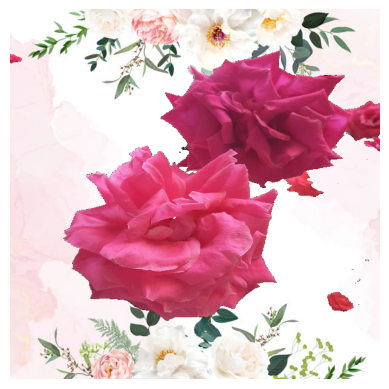

Combined image saved at: /content/combined_image.jpg


In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Upload images
# uploaded = files.upload()
path_flowers = '/content/separated_flowers.png'
path_background = '/content/background.jpg'

# Read images
flowers = cv2.imread(path_flowers)
background = cv2.imread(path_background)

# Resize flowers image to match background dimensions
flowers_resized = cv2.resize(flowers, (background.shape[1], background.shape[0]))

# Create a mask for the flowers image
gray_flowers = cv2.cvtColor(flowers_resized, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray_flowers, 10, 255, cv2.THRESH_BINARY)

# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Remove the background from the flowers image
flowers_no_bg = cv2.bitwise_and(flowers_resized, flowers_resized, mask=mask)

# Remove the flowers from the background
background_no_flowers = cv2.bitwise_and(background, background, mask=mask_inv)

# Combine the flowers image with the background
combined_image = cv2.add(background_no_flowers, flowers_no_bg)

# Save and display the combined image
output_path = '/content/combined_image.jpg'
cv2.imwrite(output_path, combined_image)
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Display the saved image path
print("Combined image saved at:", output_path)
